# Linear Regression/Gradient Boosting/Random Forest for House rent prediction task

##### Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import iplot
pio.renderers.default='notebook'
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True) 
cf.set_config_file(world_readable=True, theme='space', offline=True)

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
filename = "../data/House_Rent_Dataset.csv"

##### Load data

In [3]:
data = pd.read_csv(filename)
data

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

##### Dataframe description

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

## EDA, Data Preprocessing and Feature Engineering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data["Rent"].iplot(kind='hist', 
                   xTitle='Rent', 
                   yTitle='Counts', 
                   title='House rent distribution')

In [6]:
data["Rent"].iplot(kind='box')

In [7]:
# Apply Log Transformation in order to convert Rent into Normal Distribution
data['Rent']=np.log1p(data['Rent'])

In [8]:
data["Rent"].iplot(kind='hist', 
                   xTitle='Rent', 
                   yTitle='Counts', 
                   title='Normalized house rent distribution')

In [9]:
data["Rent"].iplot(kind='box')

In [10]:
data[['Posted On', 'Rent']].iplot(x='Posted On', 
                                  y='Rent', 
                                  mode='markers', 
                                  xTitle='Posted On', 
                                  yTitle='Rent', 
                                  title='House rent by day')

In [11]:
data["Size"].iplot(kind='hist', 
                   xTitle='Size', 
                   yTitle='Counts', 
                   title='House size distribution')

In [12]:
data["Size"].iplot(kind='box')

In [13]:
data["BHK"].iplot(kind='hist', 
                  xTitle='BHK',
                  yTitle='Counts',
                  title='BHK distribution')

In [14]:
data["Bathroom"].iplot(kind='hist', 
                       xTitle='Bathroom',
                       yTitle='Counts', 
                       title='Bathroom number distribution')

In [15]:
data[data['Bathroom']==10]

Posted On  BHK       Rent  Size            Floor   Area Type  \
4185  2022-06-06    1  12.206078  8000  Ground out of 4  Super Area   

                             Area Locality       City Furnishing Status  \
4185   Beeramguda, Ramachandra Puram, NH 9  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  
4185  Bachelors/Family        10    Contact Owner

In [16]:
data["City"].iplot(kind='hist', 
                   xTitle='City',
                   yTitle='Counts',
                   title='City distriburion'
                  )

In [17]:
data.pivot(columns='City', values='Rent').iplot(
        kind='box',
        yTitle='Rent',
        title='Rent Distribution by City'
)

In [18]:
data["Area Type"].iplot(kind='hist', 
                        xTitle='Area Type',
                        yTitle='Counts',
                        title='Area type distribution'
                       )

In [19]:
data["Furnishing Status"].iplot(kind='hist', 
                                xTitle='Furnishing Status',
                                yTitle='Counts',
                                title='Furnishing Status distribution'
)

In [20]:
data["Tenant Preferred"].iplot(kind='hist',
                               xTitle='Tenant Preferred',
                               yTitle='Counts',
                               title='Tenants distribution'
)

In [21]:
data["Point of Contact"].iplot(kind='hist', 
                               xTitle='Point of Contact',
                               yTitle='Counts',
                               title='Point of Contact distribution'
)

In [22]:
data["Floor"].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [23]:
# Get max floor from Floor column
def parse_max_floor(string):
    split = string.split('out of')
    if len(split) == 2:
        return int(split[1])    

In [24]:
# Get floor from Floor column
def parse_floor(string):
    split = string.split('out of')
    floor = split[0]
    if 'Ground' in floor:
        floor = 0
    elif 'Upper Basement' in floor:
        floor = -1
    elif 'Lower Basement' in floor:
        floor = -2
    return int(floor)

In [25]:
# Present Max Floor and Floor as different features
data["Max Floor"] = data["Floor"].apply(lambda x: parse_max_floor(x))
data["Floor"] = data["Floor"].apply(lambda x: parse_floor(x))
data

Posted On  BHK       Rent  Size  Floor    Area Type  \
0     2022-05-18    2   9.210440  1100      0   Super Area   
1     2022-05-13    2   9.903538   800      1   Super Area   
2     2022-05-16    2   9.741027  1000      1   Super Area   
3     2022-07-04    2   9.210440   800      1   Super Area   
4     2022-05-09    2   8.922792   850      1  Carpet Area   
...          ...  ...        ...   ...    ...          ...   
4741  2022-05-18    2   9.615872  1000      3  Carpet Area   
4742  2022-05-15    3  10.275086  2000      1   Super Area   
4743  2022-07-10    3  10.463132  1750      3  Carpet Area   
4744  2022-07-06    3  10.714440  1500     23  Carpet Area   
4745  2022-05-04    2   9.615872  1000      4  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  Max Floor  
0            2    Contact Owner        2.0  
1            1    Contact Owner        3.0  
2            1    Contact Owner        3.0  
3            1    Contact Owner        2.0  
4            1    Contact Owner        2.0  
...        ...              ...        ...  
4741         2    Contact Owner        5.0  
4742         3    Contact Owner        4.0  
4743         3    Contact Agent        5.0  
4744         2    Contact Agent       34.0  
4745         2    Contact Owner        5.0  

[4746 rows x 13 columns]

In [26]:
data[["Floor", "Max Floor"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Floor      4746 non-null   int64  
 1   Max Floor  4742 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 74.3 KB


##### Now we have 4 null rows, we can just drop them

In [27]:
data = data.dropna()
data = data.reset_index(drop=True)
data["Max Floor"] = data["Max Floor"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4742 non-null   object 
 1   BHK                4742 non-null   int64  
 2   Rent               4742 non-null   float64
 3   Size               4742 non-null   int64  
 4   Floor              4742 non-null   int64  
 5   Area Type          4742 non-null   object 
 6   Area Locality      4742 non-null   object 
 7   City               4742 non-null   object 
 8   Furnishing Status  4742 non-null   object 
 9   Tenant Preferred   4742 non-null   object 
 10  Bathroom           4742 non-null   int64  
 11  Point of Contact   4742 non-null   object 
 12  Max Floor          4742 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 481.7+ KB


In [28]:
# Now we can look at Floor distributions
data["Floor"].iplot(kind='hist', 
                    xTitle='Floor',
                    yTitle='Counts',
                    title='Floor discribution')

In [29]:
data["Floor"].iplot(kind='box')

In [30]:
# Now we can look at Floor distributions
data["Max Floor"].iplot(kind='hist', 
                    xTitle='Max Floor',
                    yTitle='Counts',
                    title='Max Floor discribution')

In [31]:
data["Max Floor"].iplot(kind='box')

In [32]:
# Delete outliers
data = data[(data['Rent']<15) & (data['Size']<5000)]
data.shape

(4736, 13)

In [33]:
# Data features engineering
data["Posted On"] = pd.to_datetime(data["Posted On"])
data["Day"] = data["Posted On"].dt.day
data["Month"] = data["Posted On"].dt.month
data.drop('Posted On',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4736 entries, 0 to 4741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4736 non-null   int64  
 1   Rent               4736 non-null   float64
 2   Size               4736 non-null   int64  
 3   Floor              4736 non-null   int64  
 4   Area Type          4736 non-null   object 
 5   Area Locality      4736 non-null   object 
 6   City               4736 non-null   object 
 7   Furnishing Status  4736 non-null   object 
 8   Tenant Preferred   4736 non-null   object 
 9   Bathroom           4736 non-null   int64  
 10  Point of Contact   4736 non-null   object 
 11  Max Floor          4736 non-null   int64  
 12  Day                4736 non-null   int64  
 13  Month              4736 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 555.0+ KB


##### Now we need to encode categorical data

In [34]:
label_encoder = LabelEncoder()
cat_columns = ["Area Type", "City", "Area Locality", "Furnishing Status", "Tenant Preferred", "Point of Contact"]
for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])
data

BHK       Rent  Size  Floor  Area Type  Area Locality  City  \
0       2   9.210440  1100      0          2            220     4   
1       2   9.903538   800      1          2           1524     4   
2       2   9.741027  1000      1          2           1757     4   
3       2   9.210440   800      1          2            524     4   
4       2   8.922792   850      1          1           1887     4   
...   ...        ...   ...    ...        ...            ...   ...   
4737    2   9.615872  1000      3          1            218     3   
4738    3  10.275086  2000      1          2           1211     3   
4739    3  10.463132  1750      3          1            722     3   
4740    3  10.714440  1500     23          1            588     3   
4741    2   9.615872  1000      4          1           1912     3   

      Furnishing Status  Tenant Preferred  Bathroom  Point of Contact  \
0                     2                 1         2                 2   
1                     1                 1         1                 2   
2                     1                 1         1                 2   
3                     2                 1         1                 2   
4                     2                 0         1                 2   
...                 ...               ...       ...               ...   
4737                  1                 1         2                 2   
4738                  1                 1         3                 2   
4739                  1                 1         3                 0   
4740                  1                 2         2                 0   
4741                  2                 0         2                 2   

      Max Floor  Day  Month  
0             2   18      5  
1             3   13      5  
2             3   16      5  
3             2    4      7  
4             2    9      5  
...         ...  ...    ...  
4737          5   18      5  
4738          4   15      5  
4739          5   10      7  
4740         34    6      7  
4741          5    4      5  

[4736 rows x 14 columns]

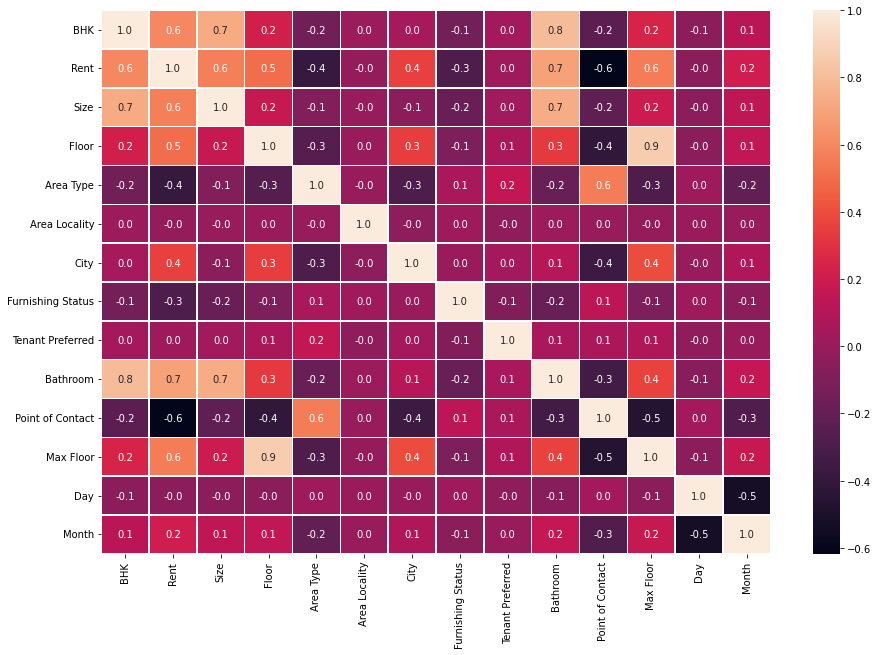

In [35]:
# Correlation analysis
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Split Data

In [36]:
X = data.drop(["Rent"], axis=1)
y = data["Rent"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [38]:
X_train.shape, y_train.shape

((3788, 13), (3788,))

In [39]:
X_test.shape, y_test.shape

((948, 13), (948,))

In [40]:
# Standardize features by removing the mean and scaling to unit variance
sts=StandardScaler()
X_train=sts.fit_transform(X_train)
X_test=sts.transform(X_test)

## Compare models

### Linear Regression

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### XGBoost Regressor

In [42]:
xgb = XGBRegressor(objective='reg:squarederror',
                  booster='gbtree',
                  learning_rate=0.1,
                  max_depth=100,
                  reg_alpha=0.5,
                  gamma=0.5
                  )

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=100, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Random Forest Regressor

In [43]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

### Cross Validation

In [44]:
kf = KFold(n_splits= 10)
models = {"LR": lr,
          "XGB": xgb,
          "RF": rf
         }

In [45]:
# Count Mean squares errors
MSEs  = {}
for name, model in models.items():
    mse = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    MSEs[name] = mse

MSEs

{'LR': 0.47874784856134156,
 'XGB': 0.3805489093138701,
 'RF': 0.39180439894556135}

In [46]:
# Count R2 scores
r2s = {}
for name, model in models.items():
    r2 = np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf))
    r2s[name] = r2

r2s

{'LR': 0.7293026581565127, 'XGB': 0.8287829644248509, 'RF': 0.8173765585251747}

### Voiting Regressor

In [47]:
estimators=[('RF', rf),('XGB', xgb)]
vc=VotingRegressor(estimators=estimators)
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('RF', RandomForestRegressor(n_estimators=500)),
                            ('XGB',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.5, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_cat_threshold=64,
                                          max_cat_to_onehot=4, max_delta_step=0,
                                          max_depth=100, max_leaves=0,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, ...))])

In [48]:
mse = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
r2 = np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf))
print("MSE", np.round(np.mean(mse),2))
print("R2", np.round(np.mean(r2),2))

MSE 0.39
R2 0.82


### Prediction

#### Voiting Regressor Prediction 

In [49]:
prediction=vc.predict(X_test)
result = pd.DataFrame({
    "Prediction": prediction,
    "True": y_test
})

In [50]:
result.iplot(x='Prediction', y='True', mode='markers')

In [51]:
mse = round(mean_squared_error(prediction, y_test), 3)
mae = round(mean_absolute_error(prediction, y_test), 3)
r2 = round(r2_score(np.exp(y_test), np.exp(prediction)), 3)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  0.142
MAE:  0.274
R2:  0.742


#### XGBoost Regressor Prediction 

In [52]:
prediction=xgb.predict(X_test)
result = pd.DataFrame({
    "Prediction": prediction,
    "True": y_test
})

In [53]:
result.iplot(x='Prediction', y='True', mode='markers')

In [54]:
mse = round(mean_squared_error(prediction, y_test), 3)
mae = round(mean_absolute_error(prediction, y_test), 3)
r2 = round(r2_score(np.exp(y_test), np.exp(prediction)), 3)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  0.142
MAE:  0.275
R2:  0.742
